In [1]:
from ensembles import VanillaEnsemble, BootstrapEnsemble
from datasets import make_dataset, make_cross_validation_dataset
from plot import plot_dataset, plot_prediction
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 4]
from evaluation import evaluate_model

In [2]:
data = make_dataset(train_p=0.8)

X = data['X']
y = data['y']
X_test = data['X_test']
y_test = data['y_test']
generate_sinoid = data['generating']
#sorted_index = data['train_index']
sorted_index = data['shuffle_index']
#test_index = data['test_ind']

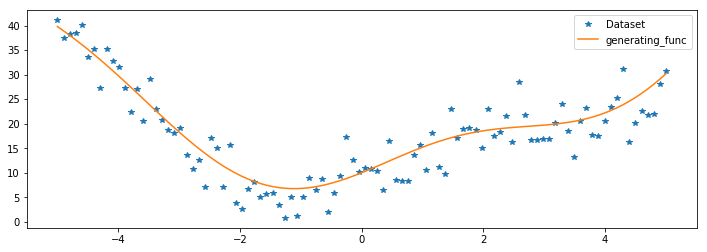

In [3]:
plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

# initialise Ensembles

In [4]:
num_epochs = 1000
ensemble = [{'num_neurons':[10,10,10,10,10],'num_epochs':num_epochs},
            {'num_neurons':[10,10,10,10],'num_epochs':num_epochs},
            {'num_neurons':[10,10,10,10,10,10],'num_epochs':num_epochs}]
        

vanilla = VanillaEnsemble(estimator_stats = ensemble)


bootstrap_ensemble = {'num_neurons':[10,10,10,10,10],'num_epochs':num_epochs}

bootstrap = BootstrapEnsemble(estimator_stats= bootstrap_ensemble)

In [5]:
def get_mean_var(pred_dict):
    return pred_dict['means'],pred_dict['stds']
    

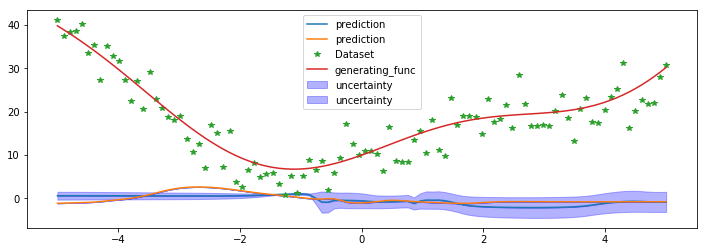

In [6]:
vanilla_pred_dict = vanilla.predict(X)
vanilla_preds, vanilla_var = get_mean_var(vanilla_pred_dict)
bootstrap_pred_dict = bootstrap.predict(X)
bootstrap_preds, bootstrap_var = get_mean_var(bootstrap_pred_dict)
plot_prediction(X,
                vanilla_preds,
                sorted_index,
                vanilla_var)

plot_prediction(X,
                bootstrap_preds,
                sorted_index,
                bootstrap_var)

plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

# Training

In [7]:
vanilla.train(X,y)
bootstrap.train(X,y)

47
49
46
52
43
50
57
43
43
42


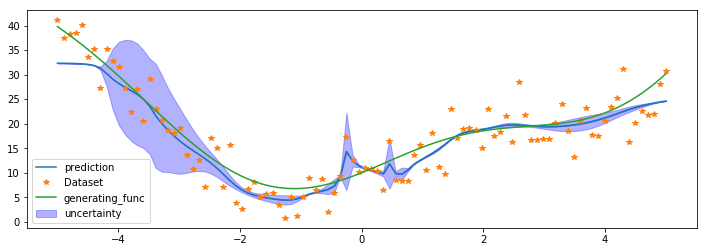

In [11]:
vanilla_pred_dict = vanilla.predict(X)
vanilla_preds, vanilla_var = get_mean_var(vanilla_pred_dict)
bootstrap_pred_dict = bootstrap.predict(X)
bootstrap_preds, bootstrap_var = get_mean_var(bootstrap_pred_dict)
plot_prediction(X,
                vanilla_preds,
                sorted_index,
                vanilla_var**2)
plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

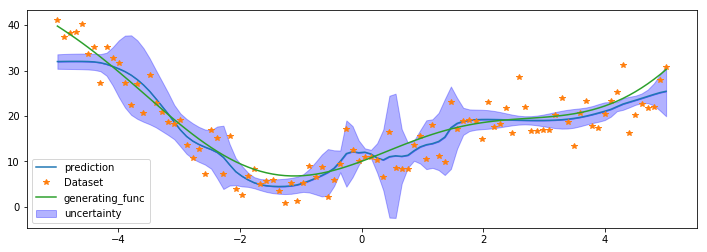

In [10]:

plot_prediction(X,
                bootstrap_preds,
                sorted_index,
                bootstrap_var**2)

plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

In [13]:
evaluate_model(X,y,vanilla_preds,var=vanilla_var**2)

RSME is 3.5999704427275203
COVERAGE PROBABILITY is 0.29


In [14]:
evaluate_model(X,y,bootstrap_preds,var=bootstrap_var**2)

RSME is 3.6826538760467886
COVERAGE PROBABILITY is 0.57
